In [143]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [6]:
#read csv
df = pd.read_csv('baseball.csv')

In [7]:
# check first 5 rows
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
# check las 5 rows
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [9]:
# check shape of the data
df.shape

(30, 17)

In [10]:
#check Basic information about dataset
df.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [13]:
#check null value  of the database
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Visualization

In [19]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [20]:
#create function
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
plt.show()

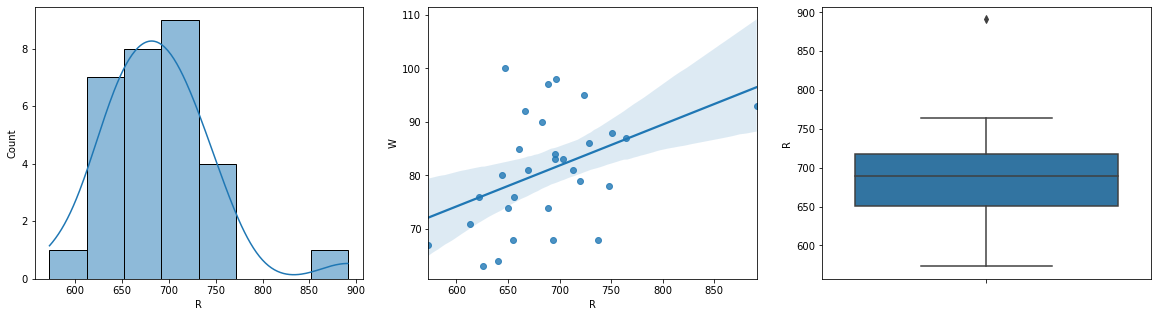

In [25]:
pplot(df,'R')

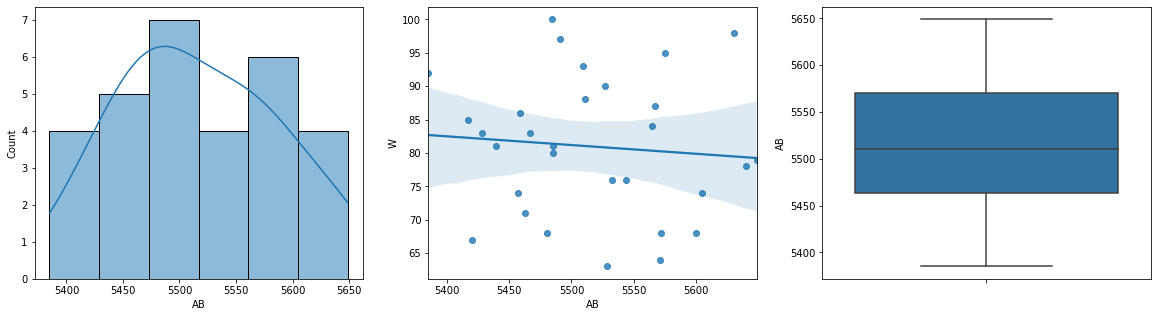

In [28]:
pplot(df,'AB')

In [29]:
# At balls is very weekly related to Wins With no outliers.

In [30]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

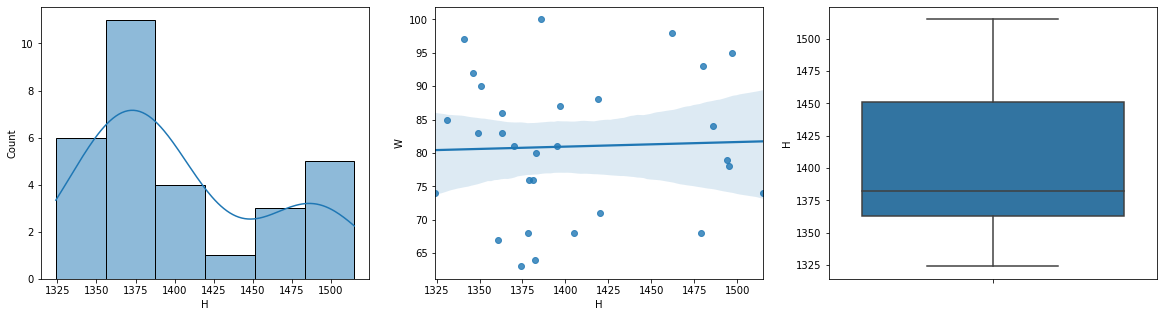

In [34]:
pplot(df,'H')

In [35]:
# Hits are also very weekly related to winning with no outliers

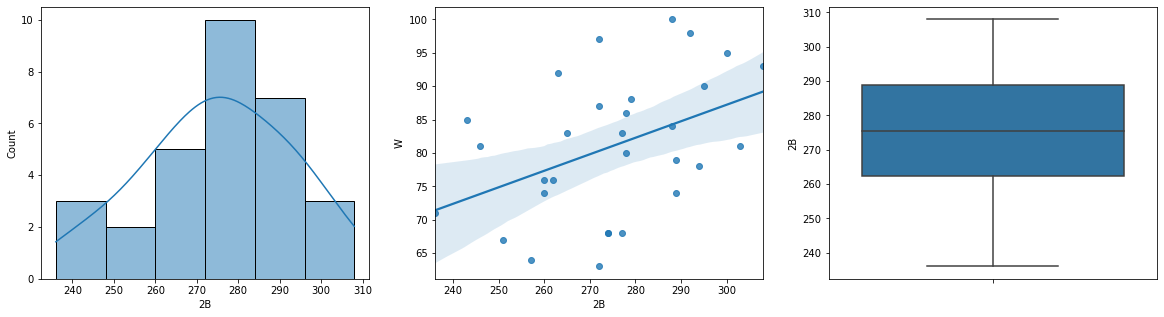

In [36]:
pplot(df,'2B')

In [37]:
# Doubles are linearly related with Wins, with no outlier, and data is left-skewed

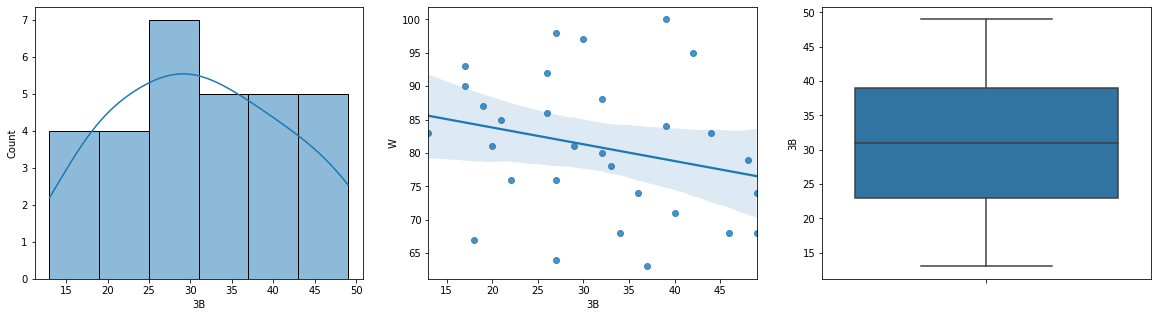

In [38]:
pplot(df,'3B')

In [40]:
# Triple has very weak negative correlations with win with no outlier and data is right-skewed

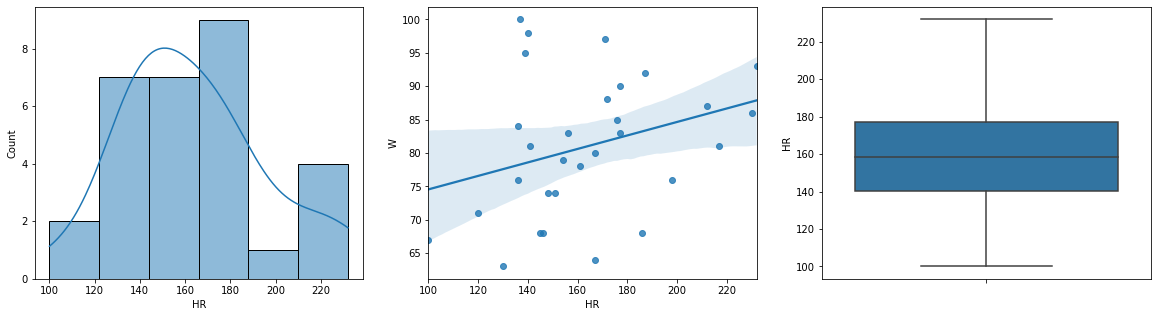

In [39]:
pplot(df,'HR')

In [42]:
# The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

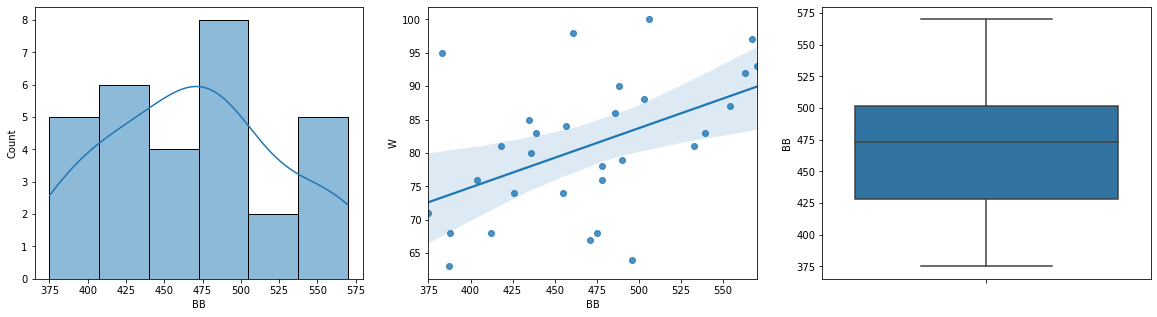

In [43]:
pplot(df,'BB')

In [45]:
# Walk is lightly correlated to win with no outlier

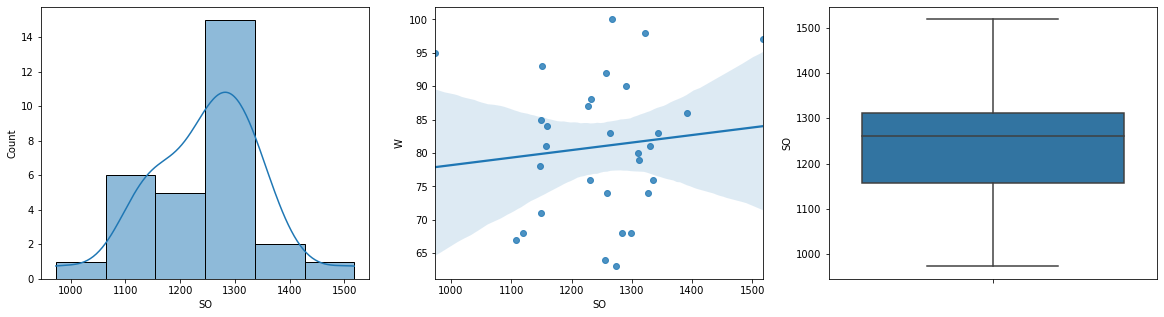

In [46]:
pplot(df,'SO')

In [47]:
# Strikeout is not correlated to win with no outlier and the dataset is left-skewed

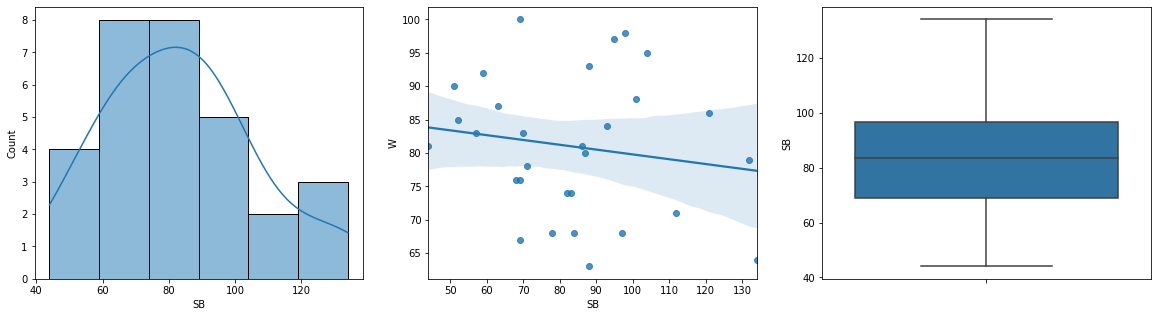

In [48]:

pplot(df,'SB')

In [49]:
# Stolen Bases is not correlated to win with no outlier

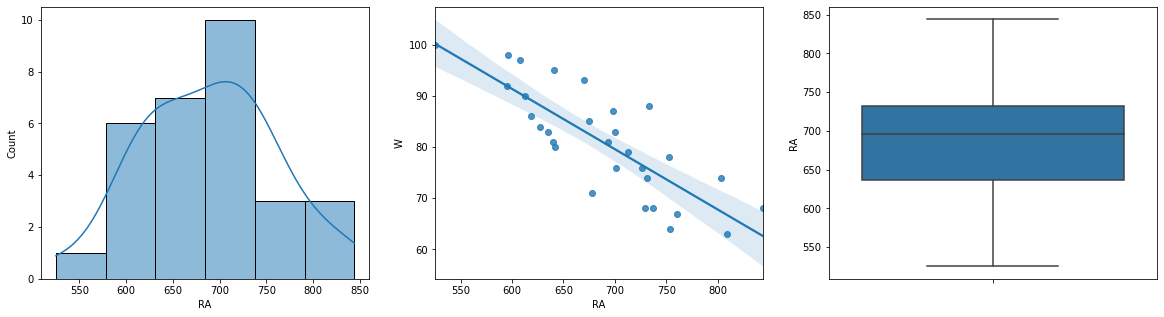

In [50]:
pplot(df,'RA')

In [51]:
# Stolen Bases is not correlated to win with no outlier

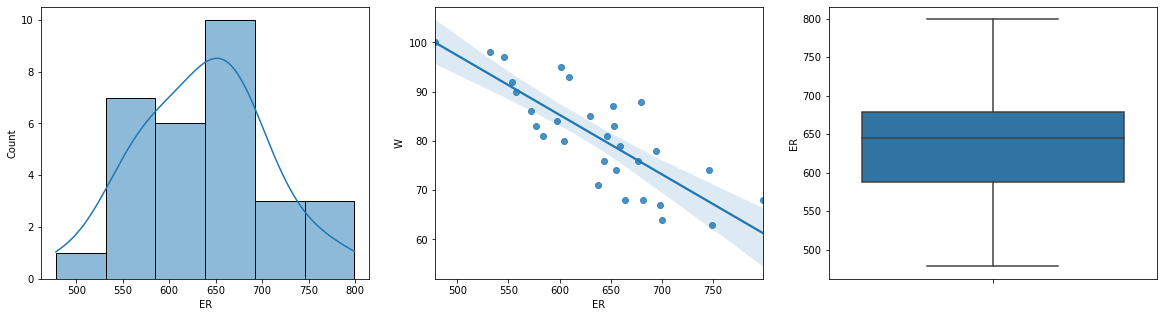

In [52]:
pplot(df,'ER')

In [53]:
# Runs Allowed is highly correlated to win with no outliers

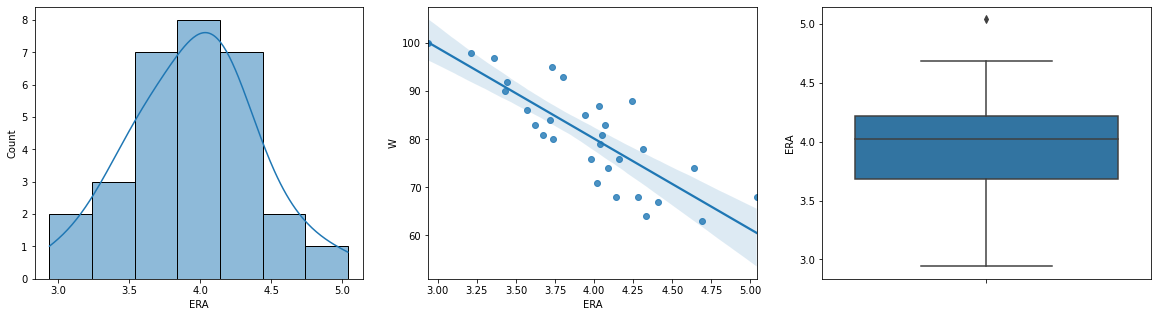

In [54]:
pplot(df,'ERA')

In [55]:
# Earned Runs is highly correlated to win with no outliers

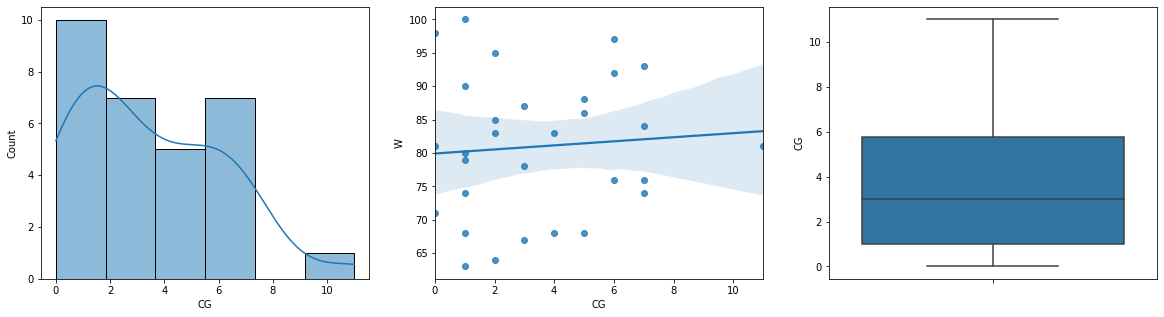

In [57]:
pplot(df,'CG')

In [56]:
# Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.

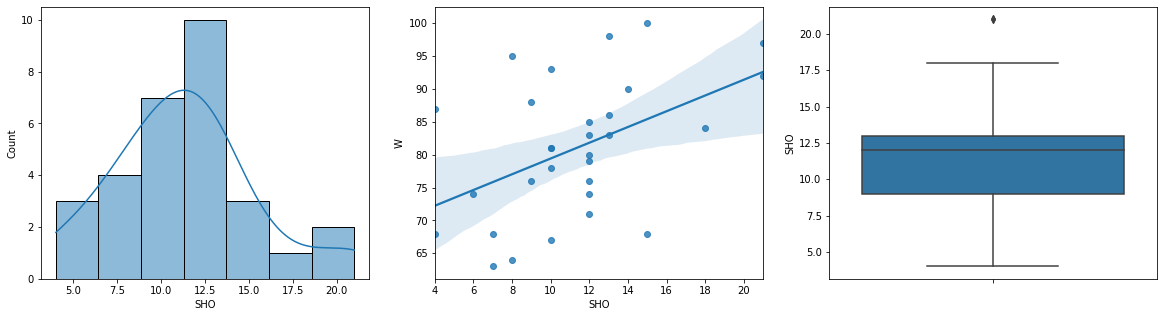

In [58]:
pplot(df,'SHO')

In [59]:
# Shutouts are highly correlated to win with no outliers and data is right-skewed

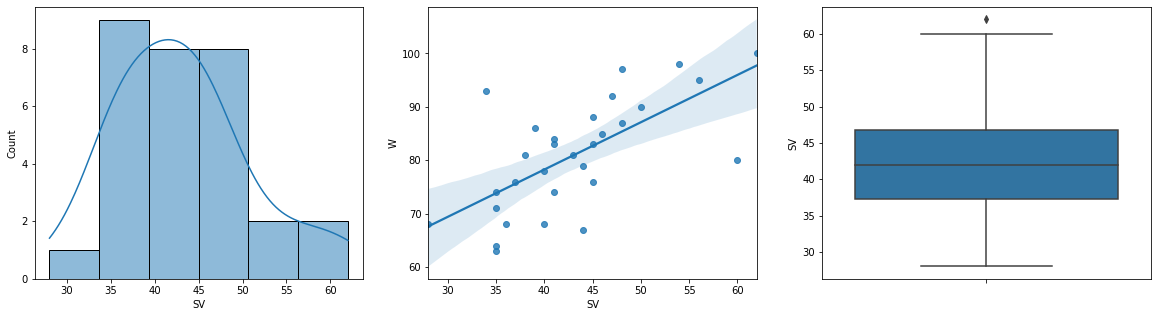

In [60]:
pplot(df,'SV')

In [61]:
# Saves are lightly correlated to win with no outliers-skewed.

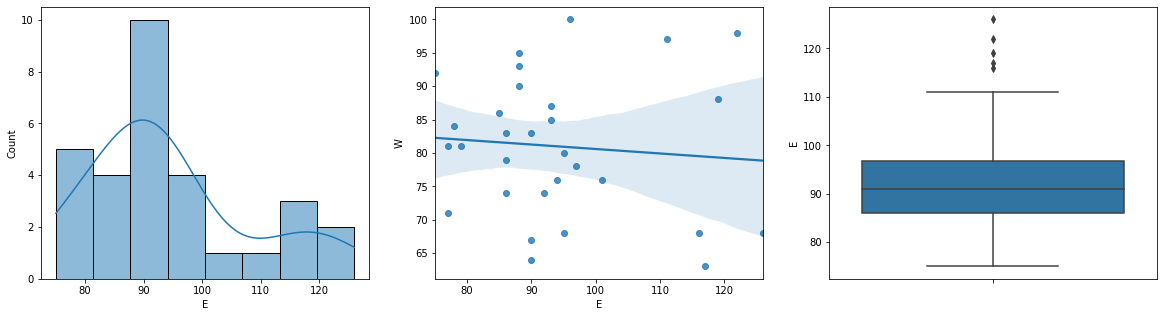

In [62]:
pplot(df,'E')

In [63]:
# Errors are not correlated to win, the data has outliers and data is right-skewed.

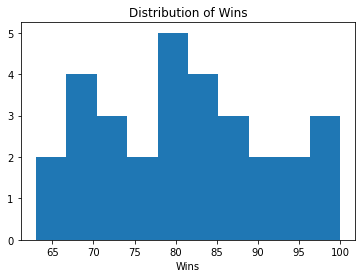

In [137]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

<AxesSubplot:>

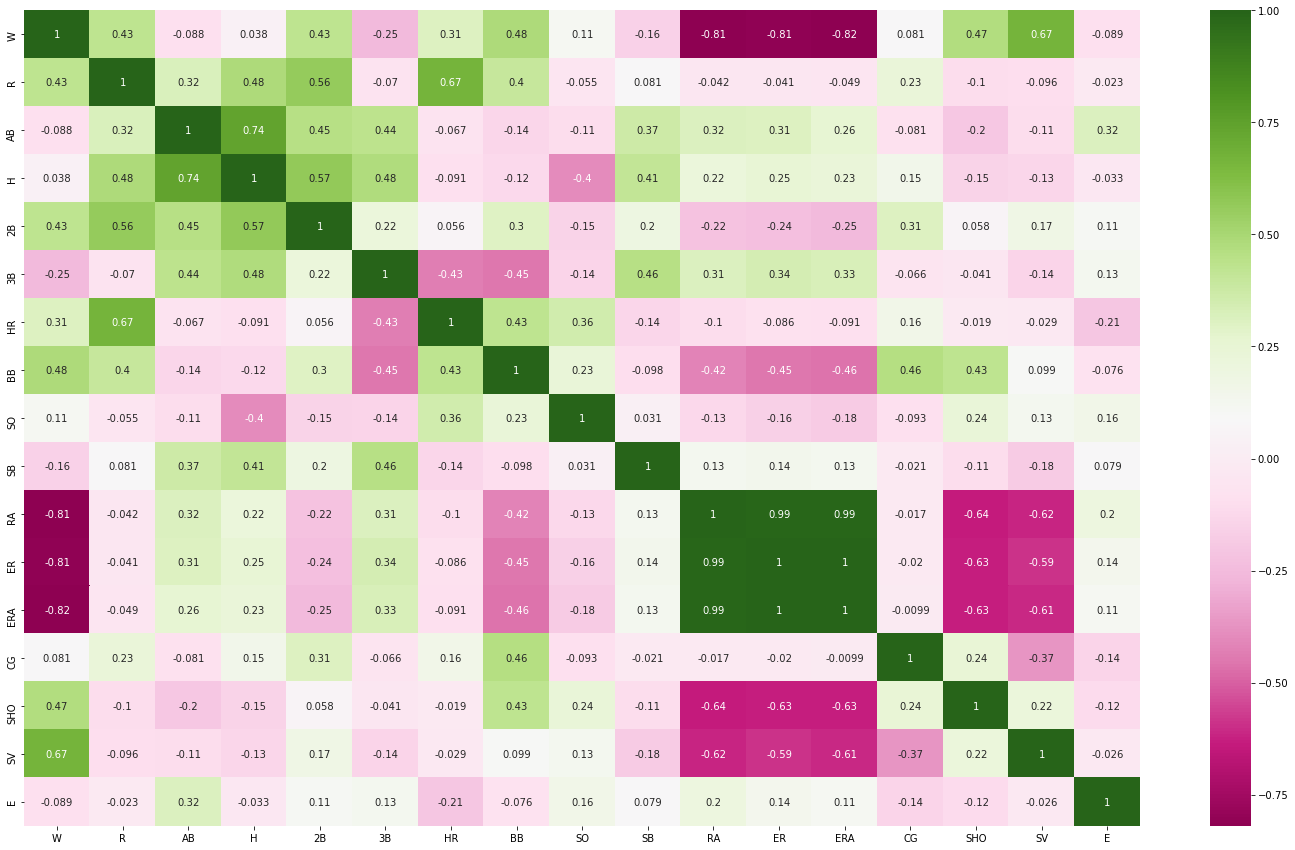

In [134]:
#create heat map
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

In [160]:
df.corr()['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

In [179]:
attributes = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E', 'labels']
data_attributes = df[attributes]

# Print the first rows of `df`
data_attributes

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,labels
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,4
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,2
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,1
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,5
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,5
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,1
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,3
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,5


In [180]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.19269543977988146], 3: [0.19369953151500063], 4: [0.17816540099857206], 5: [0.18752463440298], 6: [0.1763394851127699], 7: [0.18820537568929338], 8: [0.2128645705135584], 9: [0.16891222424086247], 10: [0.16904350849958588]}


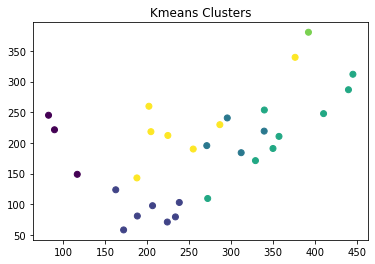

In [181]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [183]:
# Add labels from K-means model to `df` DataFrame and attributes list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,labels
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,4
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,2
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,1
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0


In [185]:
numeric_cols = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E', 'labels']
data = df[numeric_cols]

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

# Selecting Error Metric and Model

In [189]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)


# Print `mae`
print(mae)

7.105427357601002e-15


In [191]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

0.6405445242718866


# Save best Model

In [203]:
import pickle
#save model Random Forest Model
file = 'Baseball Case Study'
#save file
save = pickle.dump(lr,open(file,'wb'))